# Introduction

Implemeting data structures from Skienna

## Sorting


#### Heapsort

See https://www.geeksforgeeks.org/heap-sort/

Complexity: O(n log n)

You can build your heap in O(n). Then you pop elements off, one at a time, each taking O(log n) time.

In [10]:
def heapify(L,n,i):
    
    largest = i
    l = 2*i + 1
    r = 2*i + 2
    
    #check if left exist and is larger
    if l < n and L[l] > L[i]:
        largest = l
        
    #check if right exists and is larger
    if r < n and L[r] > L[largest]:
        largest = r
        
    #swap
    if i != largest:
        L[i], L[largest] = L[largest], L[i]
        heapify(L,n,largest)  #only recurse if there is a swap
        
        
def heapSort(L):
    
    #make a max heap
    n = len(L)
    for i in range(n,-1,-1):
        heapify(L,n,i)

    #do the swapping
    for i in range(n-1,0,-1):
        L[0], L[i] = L[i], L[0]  #largest now at end
        heapify(L,i,0)           #don't touch the sorted part
        
        
L = [5,3,8,1,2]
heapSort(L)
L

[1, 2, 3, 5, 8]

#### Merge sort

Time: O(n log n)
Space: O(N)

Good for sorting linked lists

In [39]:
def merge(x1,x2):
    """
    merges two sorted lists
    """
    
    out = []
    
    #Peel off until one is empty
    while x1 and x2:
        if x1[0] < x2[0]:
            out.append(x1.pop(0))
        else:
            out.append(x2.pop(0))
    
    #Then attach the non-empty one
    if x1:
        out += x1
    if x2:
        out += x2
        
    return out


def mergeSort(x):
    if len(x) == 1:
        return x
    else:
        mid = len(x) // 2
        L, R = x[:mid], x[mid:]
        return merge(mergeSort(L), mergeSort(R))

x = [5,1,11,9,3]
x = mergeSort(x)
x

[1, 3, 5, 9, 11]

For linked lists, (tested in the data-structures files)

In [64]:
def mergeLists(l1,l2):
    
    #Edge cases
    if not l1:
        return l2
    if not l2:
        return l1
    
    #Get head of sorted list
    if l1.val < l2.val:
        head_sorted = l1
        l1 = l1.next
    else:
        head_sorted = l2
        l2 = l2.next
        
    #Main while loop
    temp = head_sorted
    while l1 and l2:
        if l1.val < l2.val:
            temp.next = l1
            l1 = l1.next
            temp = temp.next
        else:
            temp.next = l2
            l2 = l2.next
            temp = temp.next
            
    #Catch bits at end
    temp.next = l1 or l2  #i.e attach the non empty one
    
    return head_sorted


def mergeSort(head):
    
    #Edge case
    if head is None or head.next is None:
        return head
    
    #Find midpoint
    slow,fast = head, head.next
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        
    #Now split the second half
    head2 = slow.next
    slow.next = None
    
    #Now merge these two lists
    sortedL = mergeSort(head)
    sortedR = mergeSort(head2)
    return mergeLists(sortedL, sortedR)

#### Quicksort

Complexity: O(n^2) worst case, but faster in practice

In [58]:
def partition(x,l,h):
    """
    Does two things:
    
    1. Finds the index of the pivot, p, in the sorted array
    2. Partitions x such that everything to left of p is smaller than p (but not necessarily sorted)
       and everything to the right of p is larger than p. The benefit of this is that now you can 
       use divide and conquer.
    """
    
    index_pivot = h  #index of pivot
    x_pivot = x[index_pivot]
    
    low = l-1  #index of last element in left partiton
    for i in range(l,h):
        if x[i] < x_pivot:
            low += 1
            x[i], x[low] = x[low], x[i]
            
    #swap pivot
    x[index_pivot], x[low+1] = x[low+1], x[index_pivot]
    return low + 1  #position of pivot


def quickSort(x,l,h):
    
    if l <= h:
        p = partition(x,l,h)
        quickSort(x,l,p-1)
        quickSort(x,p+1,h)
    
x = [7,9,1,11,3,6]
l, h = 0, len(x)-1
quickSort(x,0,h)
x

[1, 3, 6, 7, 9, 11]

## Graph

### BFS

[1]
[2, 3, 6]
[3, 6]
[6, 4, 5, 6]
[4, 5, 6]
[5, 6]


True

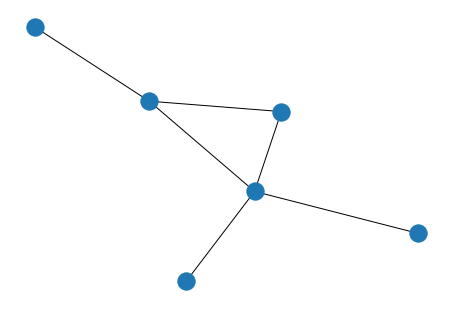

In [36]:
import numpy as np
import networkx as nx

def BFS(G,start,end):
    
    queue = [start]
    visited = set([])
    while queue:
        print(queue)
        node = queue.pop(0)   #take from top
        if node == end:
            return True
        if node not in visited: 
            visited.add(node)
            new_neighbours = set(dict(G[node]).keys()) - visited
            for n in new_neighbours:
                queue.append(n)
    return False

G = nx.Graph()
edges = [(1,2),(1,3),(3,4),(3,5),(3,6),(1,6)]
G.add_edges_from(edges)
nx.draw(G)

BFS(G,1,5)

In [44]:
def shortestPathBFS(G,start,end):
    
    queue = [(start,[start])]  #[ (node,[node1,node2,...]) ]
    visited = set([])
    while queue:
        (node,path) = queue.pop(0)   #take from top
        if node == end:
            return path
        if node not in visited: 
            visited.add(node)
            new_neighbours = set(dict(G[node]).keys()) - visited
            for n in new_neighbours:
                queue.append((n,path+[n]))
    return False

#Make graph
G = nx.Graph()
edges = [(1,2),(1,3),(3,4),(3,5),(3,6),(1,6)]
G.add_edges_from(edges)

path = shortestPathBFS(G,1,5)
path

[1, 3, 5]

In [2]:
import networkx as nx
%matplotlib inline

def find_cc(G,start):
    queue = [start]
    visited = set([])
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            neighbours = set(list(G[node].keys()))
            new_neighbours = neighbours - visited
            for n in new_neighbours:
                queue.append(n)
    return visited


def find_all_ccs(G):
    all_nodes = set(list(G.nodes()))
    ccs = []
    while all_nodes:
        start = all_nodes.pop()
        visited = find_cc(G,start)
        ccs.append(list(visited))
        all_nodes = all_nodes - visited
    return ccs
        

N,p = 20, 0.1
G = nx.erdos_renyi_graph(N,p)
ccs = find_all_ccs(G)
ccs

[[0, 1, 2, 3, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19],
 [10],
 [5],
 [12],
 [4]]